In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#read data
data=pd.read_csv("data.txt",header=None, names=['Population', 'Profit'])
#header lw fe fe l awal
print(data.head(10))
print(data.describe)
print(data.shape)
#data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))
#adding a new column called ones before the data 
data.insert(0, 'Ones', 1)
print('new data = \n' ,data.head(10) )

 #separate X (training data) from y (target variable)
cols = data.shape[1] #64x3 0 1 2
print("cols",cols)
X = data.iloc[:,0:cols-1] #al rows 0 1 cols
y = data.iloc[:,cols-1:cols]

print('X data = \n' ,X.head(10) )
print('y data = \n' ,y.head(10) )

 #convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) # for theta 0 and theta 1
print('X \n',X)
print('X.shape = ' , X.shape)
print('theta \n',theta)
print('theta.shape = ' , theta.shape)
print('y \n',y)
print('y.shape = ' , y.shape)
#cost function 
#print(type(X))
#print(type(y))
#print(type(theta))
#print(X.shape)
#print(y.shape)
#print(theta.shape)
#print(theta.T.shape)
#print((X * theta.T))
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    #print('z \n',z)
    #print('m ' ,len(X)) 
    return np.sum(z) / (2 * len(X))
print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

#GD function 
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost
#initialize variables for learning rate and iterations 
alpha = 0.01
iters = 1000
#perform gradient descent to "fit" the model parameters 
g, cost = gradientDescent(X, y, theta, alpha, iters)
print('g = ' , g)
#print('cost = ' , cost[0:50] )
print('computeCost = ' , computeCost(X, y, g))


   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
<bound method NDFrame.describe of     Population    Profit
0      6.11010  17.59200
1      5.52770   9.13020
2      8.51860  13.66200
3      7.00320  11.85400
4      5.85980   6.82330
5      8.38290  11.88600
6      7.47640   4.34830
7      8.57810  12.00000
8      6.48620   6.59870
9      5.05460   3.81660
10     5.71070   3.25220
11    14.16400  15.50500
12     5.73400   3.15510
13     8.40840   7.22580
14     5.64070   0.71618
15     5.37940   3.51290
16     6.36540   5.30480
17     5.13010   0.56077
18     6.42960   3.65180
19     7.07080   5.38930
20     6.18910   3.13860
21    20.27000  21.76700
22     5.49010   4.26300
23     6.32610   5.18750
24     5.56490   3.08250
25    18.94500  22.63800
26    12.82800  13.50100
27    10.9570

x 
 [ 0.74279     0.9595598   1.1763296   1.39309939  1.60986919  1.82663899
  2.04340879  2.26017859  2.47694838  2.69371818  2.91048798  3.12725778
  3.34402758  3.56079737  3.77756717  3.99433697  4.21110677  4.42787657
  4.64464636  4.86141616  5.07818596  5.29495576  5.51172556  5.72849535
  5.94526515  6.16203495  6.37880475  6.59557455  6.81234434  7.02911414
  7.24588394  7.46265374  7.67942354  7.89619333  8.11296313  8.32973293
  8.54650273  8.76327253  8.98004232  9.19681212  9.41358192  9.63035172
  9.84712152 10.06389131 10.28066111 10.49743091 10.71420071 10.93097051
 11.1477403  11.3645101  11.5812799  11.7980497  12.01481949 12.23158929
 12.44835909 12.66512889 12.88189869 13.09866848 13.31543828 13.53220808
 13.74897788 13.96574768 14.18251747 14.39928727 14.61605707 14.83282687
 15.04959667 15.26636646 15.48313626 15.69990606 15.91667586 16.13344566
 16.35021545 16.56698525 16.78375505 17.00052485 17.21729465 17.43406444
 17.65083424 17.86760404 18.08437384 18.3011436

Text(0.5, 1.0, 'Error vs. Training Epoch')

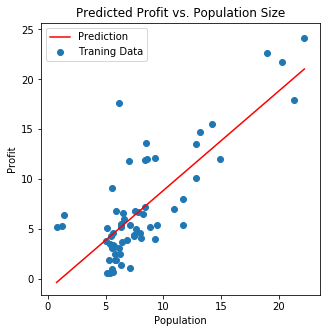

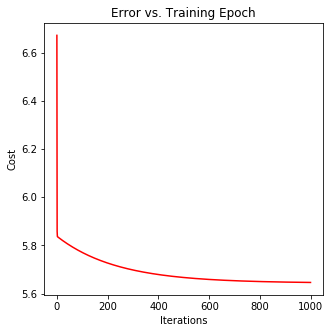

In [51]:
x = np.linspace(data.Population.min(), data.Population.max(), 100) # divide min yo mx indataset to 100 number
print('x \n',x)
print('g \n',g)
f = g[0, 0] + (g[0, 1] * x)
print('f \n',f)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
 #draw error graph with itr
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')#arange from 0 to 1000
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')